### 导入tensorflow算法包

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models,losses
%matplotlib inline

### 导入预训练数据

In [2]:
digits_train=pd.read_csv('./car/training/digits.csv')
digits_valid=pd.read_csv('./car/validation/digits.csv')

In [3]:
digits_train.shape,digits_valid.shape

((4698, 1281), (203, 1281))

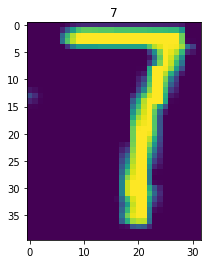

In [4]:
img = digits_train.values[1000,0:-1].reshape(40,-1)
plt.title(digits_train.values[1000,-1])
plt.imshow(img)

In [5]:
x_train,y_train=digits_train.values[:,0:-1]/255,digits_train.values[:,-1]
x_valid,y_valid=digits_valid.values[:,0:-1]/255,digits_valid.values[:,-1]
digits_label=np.array(["0","1","2","3","4","5","6","7","8","9",
                       "A","B","C","D","E","F","G","H","J","K",
                       "L","M","N","P","Q","R","S","T","U","V",
                       "W","X","Y","Z"])
# x_train=x_train.reshape(-1,40,32)
# x_valid=x_valid.reshape(-1,40,32)
digits_label.size
print(x_train.shape)
print(y_train.shape)

(4698, 1280)
(4698,)


In [6]:
model_d=models.Sequential([
#     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[40,32,1]),
#     layers.MaxPool2D(pool_size=(2,2)),
#     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
#     layers.Flatten(),
    layers.Dense(300,activation='relu',input_shape=[1280,]),
    layers.Dense(100,activation='relu'),
#     layers.Dropout(0.1),#Droput层0.1丢弃率
    layers.Dense(34,activation='softmax')#分为34类包括10个数字(0-9)以及24个英文字母(除去"I"和"O")
])
model_d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               384300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 34)                3434      
Total params: 417,834
Trainable params: 417,834
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_d.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [8]:
epochs=10
history=model_d.fit(x_train,y_train,epochs=epochs,validation_data=(x_valid,y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4698 samples, validate on 203 samples
Epoch 1/10
4698/4698 [==============================] - 1s 311us/sample - loss: 0.6497 - accuracy: 0.8370 - val_loss: 0.0604 - val_accuracy: 0.9901
Epoch 2/10
4698/4698 [==============================] - 1s 130us/sample - loss: 0.0605 - accuracy: 0.9877 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 3/10
4698/4698 [==============================] - 1s 122us/sample - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.0378 - val_accuracy: 0.9852
Epoch 4/10
4698/4698 [==============================] - 1s 121us/sample - loss: 0.0112 - accuracy: 0.9974 - val_loss: 0.0258 - val_accuracy: 0.9901
Epoch 5/10
4698/4698 [==============================] - 1s 120us/sample - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0229 - val_accuracy: 0.9901
Epoch 6/10
4698/4698 [==============================] - 1s 121us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0

In [9]:
model_d.save('./model_d.h5')